## 資料搜集

In [8]:
import requests
url = 'https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5&firstRow=60&totalRows=571'
headers = {
   'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36' 
}
res = requests.get(url , headers = headers)
jd = res.json()

In [19]:
import pandas
df = pandas.DataFrame(jd['data']['data'])
df.head()

,addInfo,addition2,addition3,addition4,addr_number_name,address,address_img,address_img_title,alley_name,allfloor,...,storeprice,street_name,streetid,type,unit,updatetime,user_id,vipBorder,vipimg,vipstyle
0,,0,0,0,,仁愛路四段仁愛路層峰名邸。24..,仁愛路層峰名邸。24H管理。氣派門廳,仁愛路層峰名邸。24H管理。氣派門廳,,15,...,0,仁愛路四段,67192,1,元/月,1496983778,1434864,,,
1,,0,0,0,,大安路二段160巷大安4房+車..,大安4房+車位,大安4房+車位,160巷,4,...,0,大安路二段,25615,1,元/月,1500179128,1061107,,,
2,,0,0,0,,仁愛路四段仁愛敦化圓環,仁愛敦化圓環,仁愛敦化圓環,,14,...,0,仁愛路四段,67192,1,元/月,1499915702,1061107,,,
3,,0,0,0,,"敦化南路一段尊貴輝煌,鑽石名..","尊貴輝煌,鑽石名宅,晉升上流,叱吒風雲","尊貴輝煌,鑽石名宅,晉升上流,叱吒風雲",,14,...,0,敦化南路一段,25662,1,元/月,1500629195,1791779,,,
4,,0,0,0,,仁愛路四段408巷國父紀念館屋..,國父紀念館屋新溫馨美宅1+1房有露台,國父紀念館屋新溫馨美宅1+1房有露台,408巷,9,...,0,仁愛路四段,25617,1,元/月,1500426244,839865,,,


In [25]:
df = df[['address', 'floor', 'allfloor', 'layout','area', 'price','browsenum_all']]

In [26]:
df.head()

,address,floor,allfloor,layout,area,price,browsenum_all
0,仁愛路四段仁愛路層峰名邸。24..,3,15,3房2廳2衛,63.0,"120,000",292
1,大安路二段160巷大安4房+車..,2,4,4房2廳2衛,37.8,"38,000",196
2,仁愛路四段仁愛敦化圓環,12,14,1房1廳1衛,21.4,"28,999",216
3,"敦化南路一段尊貴輝煌,鑽石名..",10,14,3房2廳2衛,62.4,"120,000",1
4,仁愛路四段408巷國父紀念館屋..,2,9,2房1廳1衛,22.6,"42,000",37


## 資料清理

In [32]:
df[['layout_bedroom', 'layout_livingroom', 'layout_bathroom']] = df['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛', expand=False)
df.head()

,address,floor,allfloor,layout,area,price,browsenum_all,layout_bedroom,layout_livingroom,layout_bathroom
0,仁愛路四段仁愛路層峰名邸。24..,3,15,3房2廳2衛,63.0,"120,000",292,3,2,2
1,大安路二段160巷大安4房+車..,2,4,4房2廳2衛,37.8,"38,000",196,4,2,2
2,仁愛路四段仁愛敦化圓環,12,14,1房1廳1衛,21.4,"28,999",216,1,1,1
3,"敦化南路一段尊貴輝煌,鑽石名..",10,14,3房2廳2衛,62.4,"120,000",1,3,2,2
4,仁愛路四段408巷國父紀念館屋..,2,9,2房1廳1衛,22.6,"42,000",37,2,1,1


In [33]:
df['price'] = df['price'].map(lambda e: int(''.join(e.split(','))))

In [34]:
df.head()

,address,floor,allfloor,layout,area,price,browsenum_all,layout_bedroom,layout_livingroom,layout_bathroom
0,仁愛路四段仁愛路層峰名邸。24..,3,15,3房2廳2衛,63.0,120000,292,3,2,2
1,大安路二段160巷大安4房+車..,2,4,4房2廳2衛,37.8,38000,196,4,2,2
2,仁愛路四段仁愛敦化圓環,12,14,1房1廳1衛,21.4,28999,216,1,1,1
3,"敦化南路一段尊貴輝煌,鑽石名..",10,14,3房2廳2衛,62.4,120000,1,3,2,2
4,仁愛路四段408巷國父紀念館屋..,2,9,2房1廳1衛,22.6,42000,37,2,1,1


## 資料儲存

In [37]:
df.to_excel('house591.xlsx')

In [36]:
import sqlite3 
with sqlite3.connect('house.sqlite') as db:
    df.to_sql('renthouse', con = db)

In [38]:
with sqlite3.connect('house.sqlite') as db:
    df2 = pandas.read_sql_query('select * from renthouse', con = db)
df2.head()

,index,address,floor,allfloor,layout,area,price,browsenum_all,layout_bedroom,layout_livingroom,layout_bathroom
0,0,仁愛路四段仁愛路層峰名邸。24..,3,15,3房2廳2衛,63.0,120000,292,3,2,2
1,1,大安路二段160巷大安4房+車..,2,4,4房2廳2衛,37.8,38000,196,4,2,2
2,2,仁愛路四段仁愛敦化圓環,12,14,1房1廳1衛,21.4,28999,216,1,1,1
3,3,"敦化南路一段尊貴輝煌,鑽石名..",10,14,3房2廳2衛,62.4,120000,1,3,2,2
4,4,仁愛路四段408巷國父紀念館屋..,2,9,2房1廳1衛,22.6,42000,37,2,1,1


## 資料分析

In [40]:
df.describe()

,floor,allfloor,area,price,browsenum_all
count,30.00000,30.000000,30.00000,30.000000,30.000000
mean,5.50000,11.000000,33.49000,54829.933333,330.866667
std,3.73012,4.548588,17.94254,27696.684927,670.327750
min,-1.00000,4.000000,12.00000,23500.000000,1.000000
25%,2.25000,9.000000,22.30000,39249.750000,84.750000
50%,4.50000,10.000000,26.05000,43000.000000,199.500000
75%,8.50000,13.750000,37.80000,61875.000000,282.750000
max,13.00000,26.000000,78.90000,120000.000000,3700.000000


In [45]:
df.sort_values(['price'], ascending=False).head()

,address,floor,allfloor,layout,area,price,browsenum_all,layout_bedroom,layout_livingroom,layout_bathroom
0,仁愛路四段仁愛路層峰名邸。24..,3,15,3房2廳2衛,63.0,120000,292,3,2,2
3,"敦化南路一段尊貴輝煌,鑽石名..",10,14,3房2廳2衛,62.4,120000,1,3,2,2
19,信義路二段靜巷環境單純、東門..,5,7,4房2廳2衛,72.2,100000,87,4,2,2
23,羅斯福路三段鄰近台電大樓站~..,7,19,3房2廳2衛,78.9,100000,166,3,2,2
9,信義路四段誠忠不動產(賴竑溢..,4,15,3房2廳2衛,44.4,100000,168,3,2,2


In [47]:
import requests
url = 'https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5&firstRow={}&totalRows=571'
headers = {
   'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36' 
}
house_ary = []
for i in range(0,21):
    res = requests.get(url.format(i*20) , headers = headers)
    jd = res.json()
    df = pandas.DataFrame(jd['data']['data'])
    df = df[['address', 'floor', 'allfloor', 'layout','area', 'price','browsenum_all']]
    df[['layout_bedroom', 'layout_livingroom', 'layout_bathroom']] = df['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛', expand=False)
    df['price'] = df['price'].map(lambda e: int(''.join(e.split(','))))
    house_ary.append(df)

In [48]:
df = pandas.concat(house_ary)

In [50]:
df.to_excel('house591.xlsx')

In [51]:
df = pandas.read_excel('house591.xlsx')

Populating the interactive namespace from numpy and matplotlib


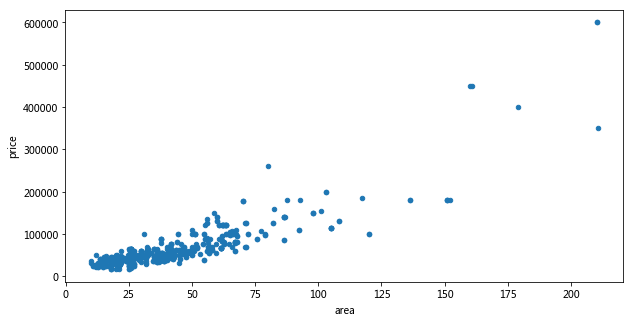

In [52]:
%pylab inline
df[['price', 'area']].plot(kind='scatter', x = 'area', y = 'price', figsize=[10,5])

In [53]:
from sklearn.linear_model import LinearRegression
y= df['price']
X = df[['area']]
regr = LinearRegression()
regr.fit(X,y)

print('Coefficient:{}'.format(regr.coef_) )
print('Intercept:{}'.format(regr.intercept_) )

Coefficient:[ 1690.54414116]
Intercept:-7334.495691834789


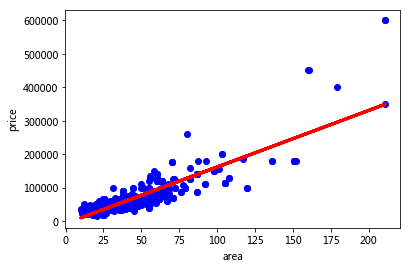

In [54]:
plt.scatter(X,y, color="blue")
plt.plot(X, regr.predict(X), linewidth = 3, color = "red")
plt.xlabel('area')
plt.ylabel('price')